Import Libraries

In [1]:
#import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import import_ipynb

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from numpy import math
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier




importing Jupyter notebook from data_preprocessing.ipynb
importing Jupyter notebook from data_analysation.ipynb
      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entr

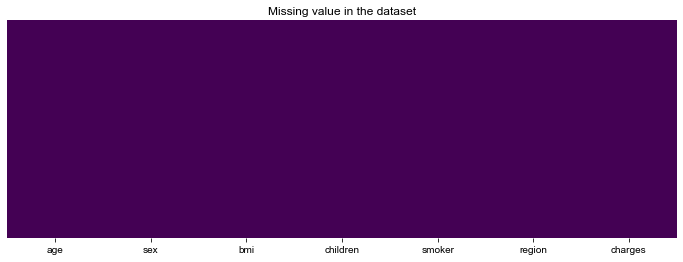

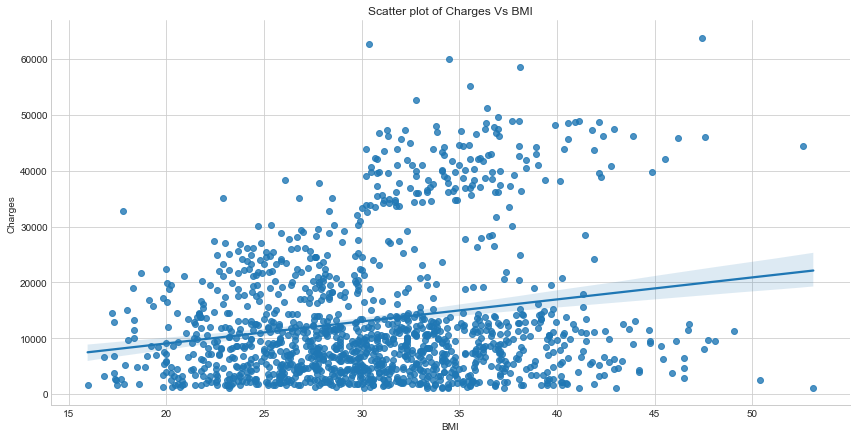

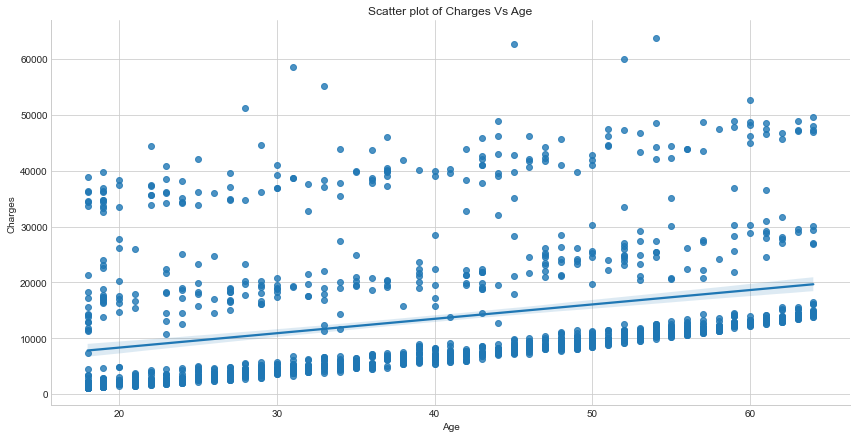

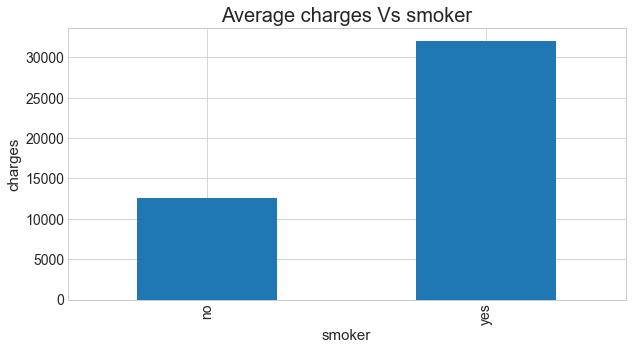

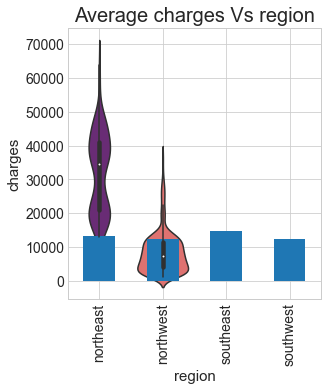

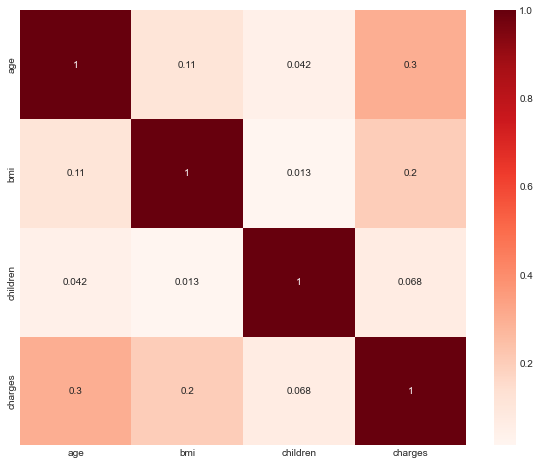

charges     1.000000
age         0.299008
bmi         0.198341
children    0.067998
Name: charges, dtype: float64
      age     bmi  children      charges  Gender  Smoker  Northeast  \
0      19  27.900         0  16884.92400       1       1          0   
1      18  33.770         1   1725.55230       0       0          0   
2      28  33.000         3   4449.46200       0       0          0   
3      33  22.705         0  21984.47061       0       0          0   
4      32  28.880         0   3866.85520       0       0          0   
...   ...     ...       ...          ...     ...     ...        ...   
1333   50  30.970         3  10600.54830       0       0          0   
1334   18  31.920         0   2205.98080       1       0          1   
1335   18  36.850         0   1629.83350       1       0          0   
1336   21  25.800         0   2007.94500       1       0          0   
1337   61  29.070         0  29141.36030       1       1          0   

      Northwest  Southeast  South

In [2]:
import data_preprocessing

Setting Up

In [3]:
dataset = data_preprocessing.df
independent_variables = data_preprocessing.independent_variables
dependent_variable = data_preprocessing.dependent_variable


Creating Data of Independent Variables and Dependent Variables

In [4]:
#independent variables data
X = dataset[independent_variables].values

#dependent variable data
y =dataset[dependent_variable].values


Splitting data

In [5]:
#Splitting the dataset 
#Into Training set and Test set

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size = 0.3, random_state = 10)

print('X train : ' , X_train.shape)
print('y train : ' , y_train.shape)
print('X test : ' , X_test.shape)
print('y test : ' , y_test.shape)


X train :  (936, 9)
y train :  (936,)
X test :  (402, 9)
y test :  (402,)


Creating Linear Regression Model

Data Transformation

In [6]:
s = MinMaxScaler()
X_train = s.fit_transform(X_train)
X_test = s.transform(X_test)

X_train[0:5]

array([[0.06521739, 0.        , 0.2       , 1.        , 0.        ,
        1.        , 0.        , 0.        , 0.        ],
       [0.2173913 , 0.58501996, 0.        , 0.        , 0.        ,
        0.        , 0.        , 1.        , 0.        ],
       [0.84782609, 0.74032769, 0.2       , 0.        , 0.        ,
        0.        , 0.        , 0.        , 1.        ],
       [0.06521739, 0.39116068, 0.        , 0.        , 0.        ,
        0.        , 0.        , 1.        , 0.        ],
       [0.39130435, 0.29560788, 0.6       , 0.        , 0.        ,
        1.        , 0.        , 0.        , 0.        ]])

In [7]:
# running linear regression
#fitting MLR to tarining data set

lin_reg = LinearRegression(fit_intercept=True)
lin_reg.fit(X_train,y_train)


LinearRegression()

Predicting the results of Test data set

In [8]:
y_pred_test = lin_reg.predict(X_test)
y_pred_train = lin_reg.predict(X_train)


In [9]:
y_pred_test[0:10]

array([ 8662.89282368,  6261.49430899, 15331.32709195, 11299.02497638,
        4104.16941974,  9577.52619566,  9565.6986991 , 25909.47181297,
        7622.08200153, 31079.90834771])

In [10]:
y_pred_train[0:10]

array([ -818.09127256,  6666.58112438, 17055.05790686,  2394.56129646,
        7798.84335693,  7703.49809866,  8196.63872448, 16329.80238477,
        1007.58971631,  8425.06491373])

In [11]:
math.sqrt(mean_squared_error(y_test, y_pred_test))

6066.309247641077

Comparison

In [40]:
print ('Actual Value' , '\t\t' , 'Predicted Value')
print('')
#showing the actual value and the predicted value of the first 30 rows

for i in range (0,30):
    print (y_test[i] , '\t\t' , y_pred_test[i])
    

Actual Value 		 Predicted Value

7281.5056 		 8662.89282368395
5267.81815 		 6261.4943089898115
12347.172 		 15331.327091948995
24513.09126 		 11299.02497637536
3736.4647 		 4104.169419737829
7358.17565 		 9577.526195656179
9788.8659 		 9565.698699095225
17085.2676 		 25909.471812969034
8211.1002 		 7622.082001534151
19798.05455 		 31079.908347705616
3077.0955 		 2143.345450338835
3385.39915 		 3992.4612279282537
6837.3687 		 7301.498825377064
8538.28845 		 11325.651698053049
26392.26029 		 12904.173104348207
13012.20865 		 11681.325753562247
3227.1211 		 5368.230275723969
15170.069 		 18548.613958550413
11073.176 		 10811.231470787636
20773.62775 		 31050.83796519034
39556.4945 		 34319.100971014544
2134.9015 		 4558.08377958942
2198.18985 		 1016.5287269640626
6555.07035 		 7284.109196552894
4340.4409 		 4224.262463119553
12622.1795 		 13915.947859276825
7740.337 		 11949.123967511292
12475.3513 		 11048.407864424365
3987.926 		 6440.174384508813
21082.16 		 31312.005502884927
